### IMPORT THƯ VIỆN

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import YearLocator, DateFormatter, MonthLocator
from sklearn.preprocessing import StandardScaler
from keras.api.models import Sequential, load_model
from keras.api.callbacks import ModelCheckpoint
from keras.api.layers import Dense, Dropout, LSTM
from keras.api.metrics import R2Score, MeanAbsoluteError, MeanAbsolutePercentageError

### ĐỌC DỮ LIỆU

In [131]:
df = pd.read_csv("du_lieu_FPT3.csv")
df

,Ngày,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá điều chỉnh,Giá trị thay đổi,% thay đổi,Tổng KL GD,Tổng GT GD
0,28/10/2024,134.1,135.0,133.6,134.9,--,0.9,0.67,"1,506,000",202.64
1,25/10/2024,134.3,134.6,133.6,134.0,--,-0.3,-0.22,"1,839,000",246.29
2,24/10/2024,134.2,134.3,133.8,134.3,--,0.1,0.07,"2,277,200",305.37
3,23/10/2024,132.9,134.8,132.6,134.2,--,1.1,0.83,"3,015,100",403.48
4,22/10/2024,135.7,135.7,133.0,133.1,--,-2.4,-1.77,"6,009,200",806.44
...,...,...,...,...,...,...,...,...,...,...
2498,24/10/2014,50.0,50.5,49.6,49.8,8.9,-0.1,-0.20,"480,290",23.95
2499,23/10/2014,50.0,51.0,49.8,49.9,8.91,-0.6,-1.19,"596,130",29.91
2500,22/10/2014,50.5,51.0,50.0,50.5,9.02,0.5,1.00,"410,150",20.71
2501,21/10/2014,50.0,50.5,49.8,50.0,8.93,0.0,0.00,"345,010",17.24


### MÔ TẢ DỮ LIỆU

In [132]:
df.head()

,Ngày,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá điều chỉnh,Giá trị thay đổi,% thay đổi,Tổng KL GD,Tổng GT GD
0,28/10/2024,134.1,135.0,133.6,134.9,--,0.9,0.67,"1,506,000",202.64
1,25/10/2024,134.3,134.6,133.6,134.0,--,-0.3,-0.22,"1,839,000",246.29
2,24/10/2024,134.2,134.3,133.8,134.3,--,0.1,0.07,"2,277,200",305.37
3,23/10/2024,132.9,134.8,132.6,134.2,--,1.1,0.83,"3,015,100",403.48
4,22/10/2024,135.7,135.7,133.0,133.1,--,-2.4,-1.77,"6,009,200",806.44


In [133]:
df.shape

(2503, 10)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ngày              2503 non-null   object 
 1   Giá mở            2503 non-null   float64
 2   Giá cao nhất      2503 non-null   float64
 3   Giá thấp nhất     2503 non-null   float64
 4   Giá đóng          2503 non-null   float64
 5   Giá điều chỉnh    2503 non-null   object 
 6   Giá trị thay đổi  2503 non-null   float64
 7   % thay đổi        2503 non-null   float64
 8   Tổng KL GD        2503 non-null   object 
 9   Tổng GT GD        2503 non-null   object 
dtypes: float64(6), object(4)
memory usage: 195.7+ KB


In [135]:
df.describe()

,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá trị thay đổi,% thay đổi
count,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000,2503.000000
mean,66.110088,66.818438,65.470336,66.130224,0.069828,0.102920
std,25.334373,25.658075,25.035448,25.368850,1.192400,1.607907
min,38.800000,39.650000,38.500000,38.800000,-10.800000,-11.030000
25%,46.800000,47.200000,46.400000,46.800000,-0.400000,-0.660000
50%,53.000000,54.000000,52.500000,53.200000,0.000000,0.000000
75%,84.600000,85.300000,83.800000,84.650000,0.500000,0.865000
max,144.300000,146.500000,143.100000,146.500000,7.800000,7.000000


In [136]:
df

,Ngày,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá điều chỉnh,Giá trị thay đổi,% thay đổi,Tổng KL GD,Tổng GT GD
0,28/10/2024,134.1,135.0,133.6,134.9,--,0.9,0.67,"1,506,000",202.64
1,25/10/2024,134.3,134.6,133.6,134.0,--,-0.3,-0.22,"1,839,000",246.29
2,24/10/2024,134.2,134.3,133.8,134.3,--,0.1,0.07,"2,277,200",305.37
3,23/10/2024,132.9,134.8,132.6,134.2,--,1.1,0.83,"3,015,100",403.48
4,22/10/2024,135.7,135.7,133.0,133.1,--,-2.4,-1.77,"6,009,200",806.44
...,...,...,...,...,...,...,...,...,...,...
2498,24/10/2014,50.0,50.5,49.6,49.8,8.9,-0.1,-0.20,"480,290",23.95
2499,23/10/2014,50.0,51.0,49.8,49.9,8.91,-0.6,-1.19,"596,130",29.91
2500,22/10/2014,50.5,51.0,50.0,50.5,9.02,0.5,1.00,"410,150",20.71
2501,21/10/2014,50.0,50.5,49.8,50.0,8.93,0.0,0.00,"345,010",17.24


### TIỀN XỬ LÝ DỮ LIỆU

In [137]:
df["Ngày"] = pd.to_datetime(df["Ngày"], format="%d/%m/%Y")

df = df.sort_values(by='Ngày')

In [138]:
df

,Ngày,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá điều chỉnh,Giá trị thay đổi,% thay đổi,Tổng KL GD,Tổng GT GD
2502,2014-10-20,50.5,51.0,50.0,50.0,8.93,-0.5,-0.99,"394,500",19.9
2501,2014-10-21,50.0,50.5,49.8,50.0,8.93,0.0,0.00,"345,010",17.24
2500,2014-10-22,50.5,51.0,50.0,50.5,9.02,0.5,1.00,"410,150",20.71
2499,2014-10-23,50.0,51.0,49.8,49.9,8.91,-0.6,-1.19,"596,130",29.91
2498,2014-10-24,50.0,50.5,49.6,49.8,8.9,-0.1,-0.20,"480,290",23.95
...,...,...,...,...,...,...,...,...,...,...
4,2024-10-22,135.7,135.7,133.0,133.1,--,-2.4,-1.77,"6,009,200",806.44
3,2024-10-23,132.9,134.8,132.6,134.2,--,1.1,0.83,"3,015,100",403.48
2,2024-10-24,134.2,134.3,133.8,134.3,--,0.1,0.07,"2,277,200",305.37
1,2024-10-25,134.3,134.6,133.6,134.0,--,-0.3,-0.22,"1,839,000",246.29


In [139]:
df['Giá mở'] = df['Giá mở'].astype(float)
df['Giá đóng'] = df['Giá đóng'].astype(float)
df['Giá cao nhất'] = df['Giá cao nhất'].astype(float)
df['Giá thấp nhất'] = df['Giá thấp nhất'].astype(float)
df['Tổng KL GD'] = df['Tổng KL GD'].replace({',': ''}, regex=True).astype(float)
df['Tổng GT GD'] = df['Tổng GT GD'].replace({',': ''}, regex=True).astype(float)

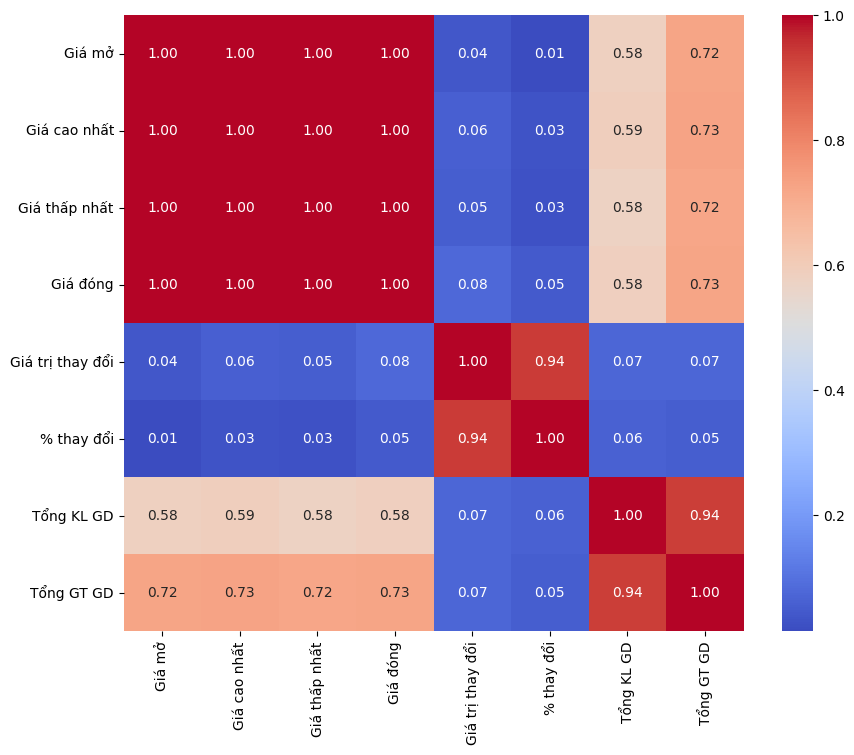

In [140]:
df_ = df.drop(columns=["Ngày", "Giá điều chỉnh"])
plt.figure(figsize=(10, 8))
sns.heatmap(df_.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [141]:
df['Năm'] = df['Ngày'].dt.year

In [142]:
df

,Ngày,Giá mở,Giá cao nhất,Giá thấp nhất,Giá đóng,Giá điều chỉnh,Giá trị thay đổi,% thay đổi,Tổng KL GD,Tổng GT GD,Năm
2502,2014-10-20,50.5,51.0,50.0,50.0,8.93,-0.5,-0.99,394500.0,19.90,2014
2501,2014-10-21,50.0,50.5,49.8,50.0,8.93,0.0,0.00,345010.0,17.24,2014
2500,2014-10-22,50.5,51.0,50.0,50.5,9.02,0.5,1.00,410150.0,20.71,2014
2499,2014-10-23,50.0,51.0,49.8,49.9,8.91,-0.6,-1.19,596130.0,29.91,2014
2498,2014-10-24,50.0,50.5,49.6,49.8,8.9,-0.1,-0.20,480290.0,23.95,2014
...,...,...,...,...,...,...,...,...,...,...,...
4,2024-10-22,135.7,135.7,133.0,133.1,--,-2.4,-1.77,6009200.0,806.44,2024
3,2024-10-23,132.9,134.8,132.6,134.2,--,1.1,0.83,3015100.0,403.48,2024
2,2024-10-24,134.2,134.3,133.8,134.3,--,0.1,0.07,2277200.0,305.37,2024
1,2024-10-25,134.3,134.6,133.6,134.0,--,-0.3,-0.22,1839000.0,246.29,2024


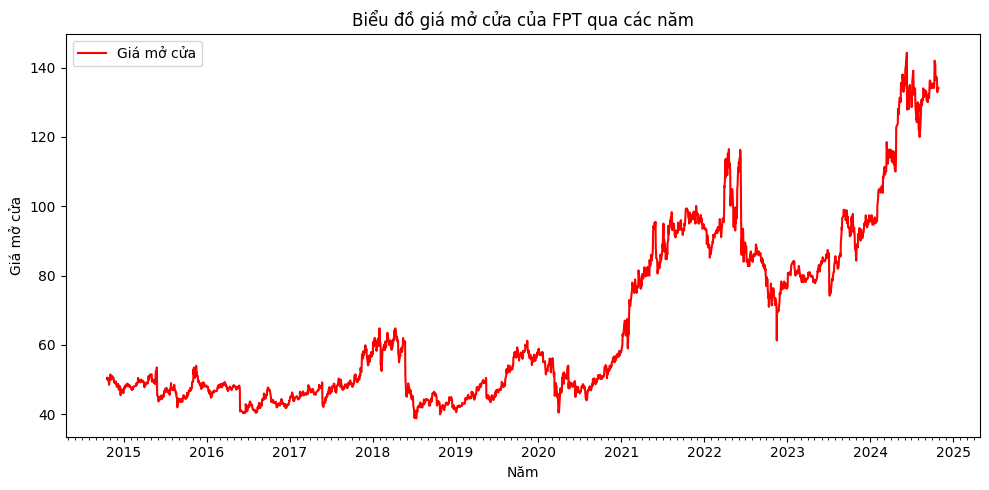

In [143]:
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Giá mở'], label='Giá mở cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá mở cửa')
plt.title('Biểu đồ giá mở cửa của FPT qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.savefig("bieudo_giamocua.png")
plt.show()

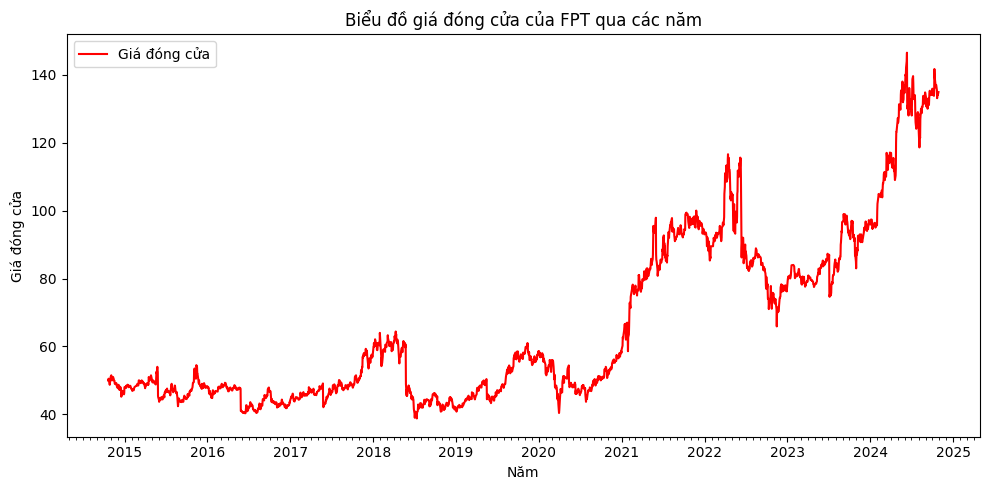

In [144]:
plt.figure(figsize=(10, 5))
plt.plot(df['Ngày'], df['Giá đóng'], label='Giá đóng cửa', color='red')
plt.xlabel('Năm')
plt.ylabel('Giá đóng cửa')
plt.title('Biểu đồ giá đóng cửa của FPT qua các năm')
plt.legend(loc='best')

# Định dạng đồ thị hiển thị các ngày tháng theo năm-tháng
years = YearLocator()
yearsFmt = DateFormatter('%Y')
months = MonthLocator()  # Thêm dòng này để khai báo MonthLocator
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(yearsFmt)
plt.gca().xaxis.set_minor_locator(months)

plt.tight_layout()
plt.savefig("bieudo_giadongcua.png")
plt.show()

In [145]:
df1 = pd.DataFrame(df,columns=['Ngày','Giá đóng'])
df1.index = df1.Ngày
df1.drop('Ngày',axis=1,inplace=True)
df1

,Giá đóng
Ngày,
2014-10-20,50.0
2014-10-21,50.0
2014-10-22,50.5
2014-10-23,49.9
2014-10-24,49.8
...,...
2024-10-22,133.1
2024-10-23,134.2
2024-10-24,134.3


In [146]:
data = df1.values
train_data = data[:1500]
test_data = data[1500:]

In [147]:
data

array([[ 50. ],
       [ 50. ],
       [ 50.5],
       ...,
       [134.3],
       [134. ],
       [134.9]])

In [148]:
scale = StandardScaler()
scale_data_train = scale.fit_transform(data)

In [149]:
X_train, y_train= [], []

for i in range(50, len(train_data)):
  X_train.append(scale_data_train[i - 50:i, 0])
  y_train.append(scale_data_train[i, 0])

In [150]:
X_train

[array([-0.635955  , -0.635955  , -0.61624185, -0.63989763, -0.64384026,
        -0.68720919, -0.6753813 , -0.635955  , -0.635955  , -0.59652871,
        -0.57681556, -0.59652871, -0.61624185, -0.635955  , -0.61624185,
        -0.61624185, -0.59652871, -0.61624185, -0.61624185, -0.635955  ,
        -0.63989763, -0.67143867, -0.6753813 , -0.6753813 , -0.67143867,
        -0.68326656, -0.66749604, -0.68326656, -0.68720919, -0.71086497,
        -0.72269286, -0.72663549, -0.70692234, -0.69115182, -0.68720919,
        -0.70297971, -0.74634864, -0.72663549, -0.73846338, -0.71086497,
        -0.72269286, -0.74634864, -0.82520123, -0.78577493, -0.80943071,
        -0.7818323 , -0.75817653, -0.75817653, -0.77394705, -0.78577493]),
 array([-0.635955  , -0.61624185, -0.63989763, -0.64384026, -0.68720919,
        -0.6753813 , -0.635955  , -0.635955  , -0.59652871, -0.57681556,
        -0.59652871, -0.61624185, -0.635955  , -0.61624185, -0.61624185,
        -0.59652871, -0.61624185, -0.61624185, -0

In [151]:
y_train

[-0.7976028239741044,
 -0.7818323048822904,
 -0.7148075987420802,
 -0.7226928582879875,
 -0.7108649689691267,
 -0.6990370796502662,
 -0.7187502285150338,
 -0.7029797094232197,
 -0.691151820104359,
 -0.6872091903314054,
 -0.691151820104359,
 -0.6872091903314054,
 -0.6950944498773126,
 -0.7148075987420802,
 -0.7148075987420802,
 -0.6990370796502662,
 -0.7069223391961731,
 -0.6990370796502662,
 -0.6990370796502662,
 -0.7148075987420802,
 -0.7187502285150338,
 -0.7187502285150338,
 -0.7345207476068479,
 -0.7384633773798015,
 -0.7542338964716155,
 -0.7581765262445691,
 -0.7463486369257084,
 -0.7424060071527551,
 -0.7463486369257084,
 -0.750291266698662,
 -0.7345207476068479,
 -0.7226928582879875,
 -0.7148075987420802,
 -0.691151820104359,
 -0.6950944498773126,
 -0.6753813010125449,
 -0.6832665605584521,
 -0.6950944498773126,
 -0.6793239307854985,
 -0.6359550032830096,
 -0.6359550032830096,
 -0.6359550032830096,
 -0.6674960414666378,
 -0.64778289260187,
 -0.6556681521477773,
 -0.667496041466

In [152]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [172]:
X_train.shape, y_train.shape

((1450, 50, 1), (1450, 1))

### XÂY DỰNG VÀ HUẤN LUYỆN MÔ HÌNH

In [153]:
model = Sequential([
    LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True),
    LSTM(64),
    Dropout(0.5),
    Dense(1)
])

model.compile(loss='mean_absolute_error', optimizer='adam')

C:\Users\LE TUAN DAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [154]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 116,033 (453.25 KB)

 Trainable params: 116,033 (453.25 KB)

 Non-trainable params: 0 (0.00 B)

In [155]:
save_model = "save_model.keras"
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

model.fit(X_train, y_train, epochs=100, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/100

Epoch 1: loss improved from inf to 0.18619, saving model to save_model.keras
29/29 - 5s - 166ms/step - loss: 0.1862
Epoch 2/100

Epoch 2: loss improved from 0.18619 to 0.10595, saving model to save_model.keras
29/29 - 1s - 28ms/step - loss: 0.1060
Epoch 3/100

Epoch 3: loss improved from 0.10595 to 0.09934, saving model to save_model.keras
29/29 - 1s - 26ms/step - loss: 0.0993
Epoch 4/100

Epoch 4: loss improved from 0.09934 to 0.09635, saving model to save_model.keras
29/29 - 1s - 28ms/step - loss: 0.0963
Epoch 5/100

Epoch 5: loss improved from 0.09635 to 0.09351, saving model to save_model.keras
29/29 - 1s - 26ms/step - loss: 0.0935
Epoch 6/100

Epoch 6: loss improved from 0.09351 to 0.09022, saving model to save_model.keras
29/29 - 1s - 26ms/step - loss: 0.0902
Epoch 7/100

Epoch 7: loss improved from 0.09022 to 0.08963, saving model to save_model.keras
29/29 - 1s - 26ms/step - loss: 0.0896
Epoch 8/100

Epoch 8: loss improved from 0.08963 to 0.08519, saving model to sa

In [156]:
y_train = scale.inverse_transform(y_train)
final_model = load_model("save_model.keras")
y_train_predict = final_model.predict(X_train)
y_train_predict = scale.inverse_transform(y_train_predict)

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


### TÁI SỬ DỤNG MÔ HÌNH

In [157]:
test = df1[len(train_data) - 50:].values.reshape(-1, 1)
scale_test = scale.transform(test)

In [158]:
X_test = []
for i in range(50, test.shape[0]):
    X_test.append(scale_test[i - 50:i, 0])
  
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [159]:
y_test = data[1500:]
y_test_predict = final_model.predict(X_test)
y_test_predict = scale.inverse_transform(y_test_predict)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


### ĐỘ CHÍNH XÁC CỦA MÔ HÌNH

C:\Users\LE TUAN DAT\AppData\Local\Temp\ipykernel_11996\2622046295.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data1['Dự đoán'] = y_train_predict
C:\Users\LE TUAN DAT\AppData\Local\Temp\ipykernel_11996\2622046295.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data1['Dự đoán'] = y_test_predict


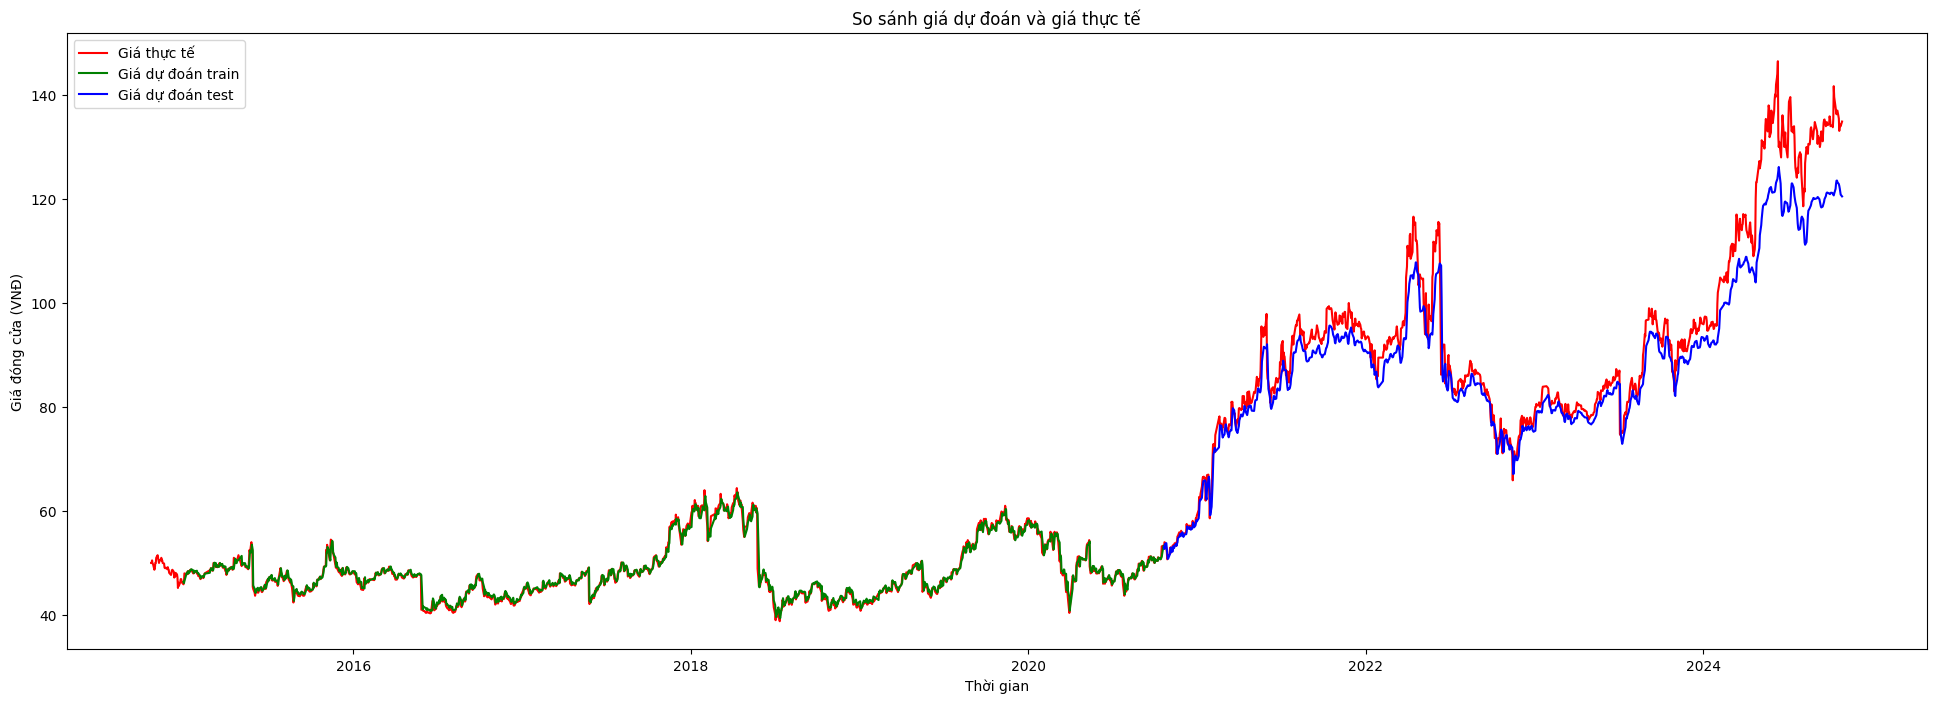

In [160]:
train_data1 = df1[50:1500]
test_data1 = df1[1500:]

plt.figure(figsize=(24, 8))
plt.plot(df1, label='Giá thực tế', color='red')

train_data1['Dự đoán'] = y_train_predict
plt.plot(train_data1['Dự đoán'], label='Giá dự đoán train', color='green')

test_data1['Dự đoán'] = y_test_predict
plt.plot(test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')

plt.title("So sánh giá dự đoán và giá thực tế")
plt.xlabel("Thời gian")
plt.ylabel("Giá đóng cửa (VNĐ)")
plt.legend()
plt.savefig("sosanh_real+predict_price.png")
plt.show()

In [161]:
r2 = R2Score()
r2.update_state(y_train, y_train_predict)
print(f"Độ phù hợp tập train: {r2.result()}")

mae = MeanAbsoluteError()
mae.update_state(y_train, y_train_predict)
print(f"MAE tập train (VNĐ): {mae.result()}")

mape = MeanAbsolutePercentageError()
mape.update_state(y_train, y_train_predict)
print(f"MAPE tập train (VNĐ): {mape.result()}")

Độ phù hợp tập train: 0.9711908102035522
MAE tập train (VNĐ): 0.5685585737228394
MAPE tập train (VNĐ): 1.1724634170532227


In [162]:
train_data1

,Giá đóng,Dự đoán
Ngày,,
2014-12-29,45.9,46.388470
2014-12-30,46.3,46.120132
2014-12-31,48.0,46.507099
2015-01-05,47.8,48.101871
2015-01-06,48.1,47.965076
...,...,...
2020-10-14,51.0,50.728771
2020-10-15,51.2,50.969265
2020-10-16,53.2,51.191422


In [163]:
r2 = R2Score()
r2.update_state(y_test, y_test_predict)
print(f"Độ phù hợp tập train: {r2.result()}")

mae = MeanAbsoluteError()
mae.update_state(y_test, y_test_predict)
print(f"MAE tập train (VNĐ): {mae.result()}")

mape = MeanAbsolutePercentageError()
mape.update_state(y_test, y_test_predict)
print(f"MAPE tập train (VNĐ): {mape.result()}")

Độ phù hợp tập train: 0.9085338115692139
MAE tập train (VNĐ): 4.204545021057129
MAPE tập train (VNĐ): 4.00135612487793


In [164]:
test_data1

,Giá đóng,Dự đoán
Ngày,,
2020-10-21,52.8,53.091656
2020-10-22,54.0,52.699356
2020-10-23,53.9,53.647877
2020-10-26,52.8,53.811092
2020-10-27,52.1,52.822208
...,...,...
2024-10-22,133.1,122.524460
2024-10-23,134.2,122.043037
2024-10-24,134.3,121.402122


### THỬ DỰ ĐOÁN TƯƠNG LAI VÀ SO SÁNH VỚI GIÁ NGÀY CUỐI

In [165]:
next_date = df['Ngày'].iloc[-1] + pd.Timedelta(days=1)
next_date = pd.to_datetime(next_date)
next_date

Timestamp('2024-10-29 00:00:00')

In [166]:
next_closing_price = np.array([df['Giá đóng'].iloc[-1]])
next_closing_price_normalized = scale.transform(next_closing_price.reshape(-1, 1))
next_closing_price_normalized

array([[2.71133767]])

In [167]:
X_next = np.array([scale_data_train[-50:, 0]])
X_next = np.reshape(X_next, (X_next.shape[0], X_next.shape[1], 1))
y_next_predict = final_model.predict(X_next)
y_next_predict = scale.inverse_transform(y_next_predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [168]:
y_next_predict[0][0]

120.375275

In [169]:
df_next = pd.DataFrame({
    'Ngày': [next_date],
    'Giá đóng': [y_next_predict[0][0]]
})
df1 = pd.concat([df1, df_next])
df1

,Giá đóng,Ngày
2014-10-20 00:00:00,50.000000,NaT
2014-10-21 00:00:00,50.000000,NaT
2014-10-22 00:00:00,50.500000,NaT
2014-10-23 00:00:00,49.900000,NaT
2014-10-24 00:00:00,49.800000,NaT
...,...,...
2024-10-23 00:00:00,134.200000,NaT
2024-10-24 00:00:00,134.300000,NaT
2024-10-25 00:00:00,134.000000,NaT
2024-10-28 00:00:00,134.900000,NaT


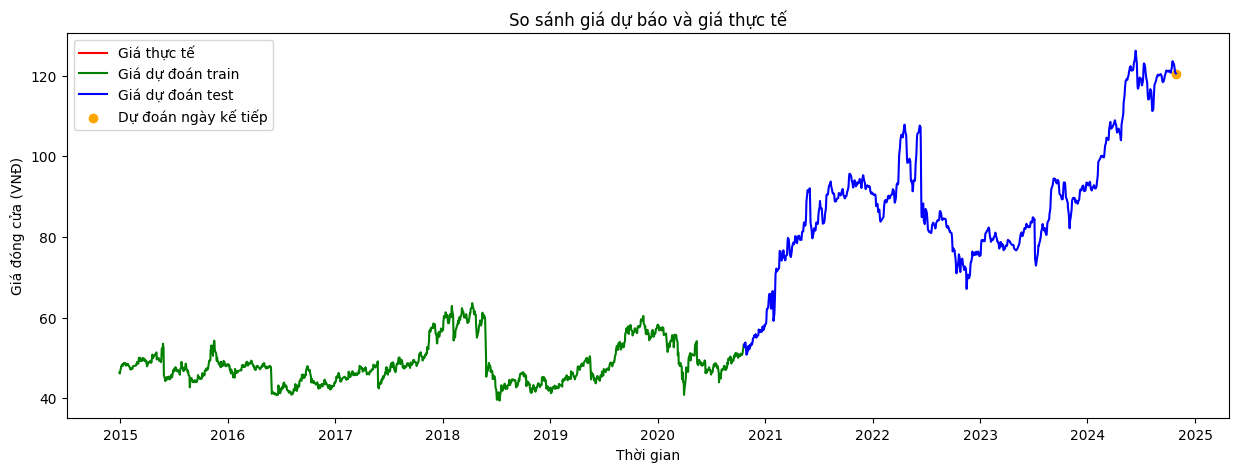

In [170]:
plt.figure(figsize=(15, 5))
plt.plot(df1['Ngày'], df1['Giá đóng'], label='Giá thực tế', color='red')
plt.plot(train_data1.index, train_data1['Dự đoán'], label='Giá dự đoán train', color='green')
plt.plot(test_data1.index, test_data1['Dự đoán'], label='Giá dự đoán test', color='blue')
plt.scatter([next_date], [y_next_predict[0][0]], color='orange', label='Dự đoán ngày kế tiếp')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa (VNĐ)')
plt.title('So sánh giá dự báo và giá thực tế')
plt.legend()
plt.show()

In [171]:
actual_closing_price = df['Giá đóng'].iloc[-1]

comparison_df = pd.DataFrame({'Ngày': [next_date], 'Giá dự đoán': [y_next_predict[0][0]], 
                              'Giá ngày trước': [actual_closing_price]})

comparison_df

,Ngày,Giá dự đoán,Giá ngày trước
0,2024-10-29,120.375275,134.9
